In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as xp
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder , RobustScaler ,StandardScaler
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore')
import joblib

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Check The Data Shape

In [3]:
df.shape

(10683, 11)

### 10683 rows × 11 columns

### Check The Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Check for duplicates in  data

In [5]:
df.duplicated().sum()

220

### Here there are 220 duplicated values in the data

### Drop duplicated values

In [6]:
df.drop_duplicates(inplace=True)

### Reset index of the data

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10459,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10460,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10461,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: xlabel='count', ylabel='Airline'>

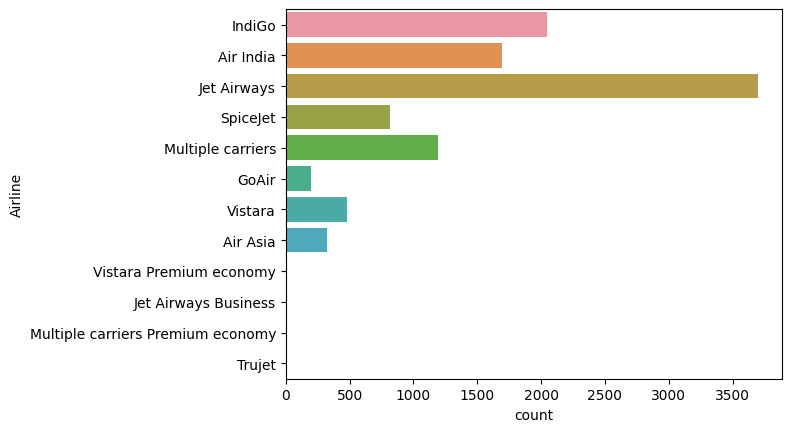

In [10]:
sns.countplot(data = df , y = 'Airline')

<Axes: xlabel='count', ylabel='Source'>

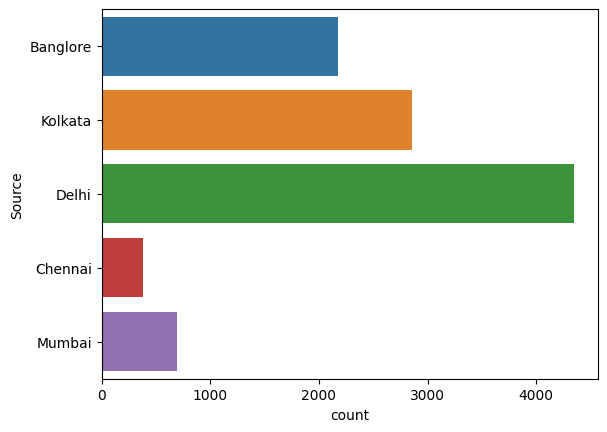

In [11]:
sns.countplot(data = df , y = 'Source')

In [12]:
df['Date_of_Journey'].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [13]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

### Convert Date_of_Journey from object to datetime datatype

In [14]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
df['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<Axes: xlabel='count', ylabel='Source'>

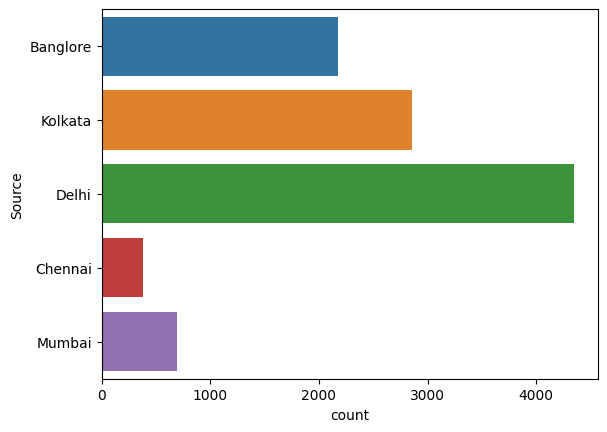

In [18]:
sns.countplot(data = df , y = 'Source')

In [19]:
df['Destination'].value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: xlabel='count', ylabel='Destination'>

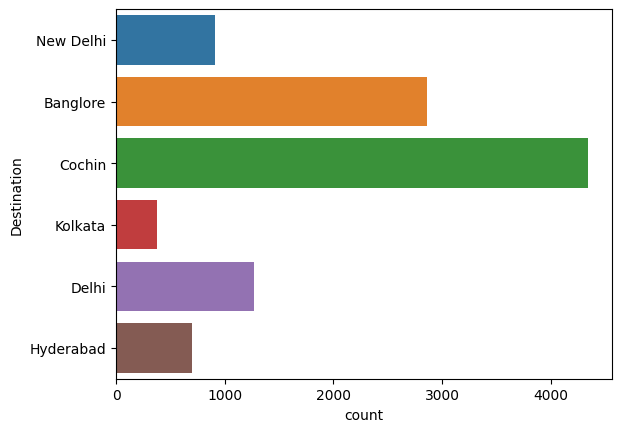

In [21]:
sns.countplot(data = df , y = 'Destination')

In [22]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [23]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [24]:
df['StopCount'] = df['Route'].astype(str).apply(lambda x : x.count('→')-1)
df['StopCount'].unique()

array([ 0,  2,  1,  3, -1,  4], dtype=int64)

In [25]:
df[['StopCount','Total_Stops']]

,StopCount,Total_Stops
0,0,non-stop
1,2,2 stops
2,2,2 stops
3,1,1 stop
4,1,1 stop
...,...,...
10458,0,non-stop
10459,0,non-stop
10460,0,non-stop
10461,0,non-stop


In [26]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,0
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,0
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,0


In [27]:
for i in range(5) : 
    print(f"for value {i} , Number of Stops is {df[df['StopCount']==i]['Total_Stops'].unique()}")    

for value 0 , Number of Stops is ['non-stop']
for value 1 , Number of Stops is ['1 stop']
for value 2 , Number of Stops is ['2 stops']
for value 3 , Number of Stops is ['3 stops']
for value 4 , Number of Stops is ['4 stops']


In [28]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
22:25      1
16:25      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

### Clean and Handling Dep_Time and convert it to Datetime

In [29]:
df['Dep_Time'] = pd.to_datetime(df['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df['Dep_Time'], format='%Y-%m-%d %H:%M')

In [30]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,13:15,7h 25m,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,23:30,5h 25m,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,21:35,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,22:25,2h 30m,non-stop,No info,4107,0
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,23:20,2h 35m,non-stop,No info,4145,0
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,11:20,3h,non-stop,No info,7229,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,14:10,2h 40m,non-stop,No info,12648,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  object        
 7   Duration         10463 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
 11  StopCount        10463 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 981.0+ KB


### Clean and handling Arrival_Time Column

In [32]:
df['Arrival_Time'].unique().tolist()

['01:10 22 Mar',
 '13:15',
 '04:25 10 Jun',
 '23:30',
 '21:35',
 '11:25',
 '10:25 13 Mar',
 '05:05 02 Mar',
 '19:15',
 '23:00',
 '22:55',
 '13:55',
 '09:20 10 May',
 '19:50',
 '19:15 04 Mar',
 '12:35 13 Jun',
 '19:15 13 Jun',
 '12:35 28 May',
 '19:20',
 '13:20 19 Mar',
 '06:50',
 '21:50',
 '08:15 07 May',
 '12:35 10 Jun',
 '03:35 02 Jun',
 '12:55',
 '12:35',
 '09:20',
 '23:15',
 '12:35 16 Jun',
 '21:00',
 '20:20',
 '16:45',
 '19:00',
 '18:10',
 '15:15',
 '19:00 19 May',
 '08:35',
 '11:05 16 May',
 '19:00 28 Jun',
 '14:15',
 '10:55 02 May',
 '01:10 28 Mar',
 '00:15 19 Jun',
 '02:45 04 Apr',
 '12:00 25 Mar',
 '23:55',
 '01:30 07 May',
 '16:45 07 Mar',
 '09:25 04 Apr',
 '01:30 16 May',
 '15:25',
 '15:35',
 '08:30',
 '08:15 13 Mar',
 '12:35 25 Jun',
 '10:05',
 '14:30',
 '07:55',
 '10:35',
 '12:00 10 Jun',
 '22:35',
 '04:40 07 May',
 '11:25 07 Mar',
 '07:25',
 '04:25 07 Jun',
 '20:45',
 '14:25 25 May',
 '22:30',
 '13:20',
 '23:20',
 '07:40',
 '22:50',
 '08:15 10 Jun',
 '04:25 25 Jun',
 '14:

In [33]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [34]:
df['Arrival_Time'] = pd.to_datetime(df['Date_of_Journey'].dt.strftime('%Y-%m-%d') + ' ' + df['Arrival_Time'], format='%Y-%m-%d %H:%M')

In [35]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-24 01:10:00,2h 50m,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,7h 25m,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-06 04:25:00,19h,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,5h 25m,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,4h 45m,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,2h 30m,non-stop,No info,4107,0
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,2h 35m,non-stop,No info,4145,0
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,3h,non-stop,No info,7229,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,2h 40m,non-stop,No info,12648,0


### Clean and handling Duration Column

In [36]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [37]:
df.loc[df['Arrival_Time'] < df['Dep_Time'], 'Arrival_Time'] += pd.Timedelta(days=1)

In [38]:
df['Duration']=df['Arrival_Time']-df['Dep_Time']

In [39]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0


In [40]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

<Axes: xlabel='count', ylabel='Total_Stops'>

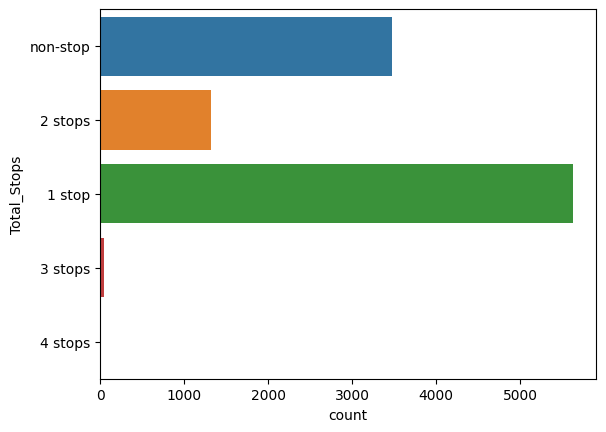

In [41]:
sns.countplot(data=df,y='Total_Stops')

In [42]:
df['Additional_Info'].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<Axes: xlabel='count', ylabel='Additional_Info'>

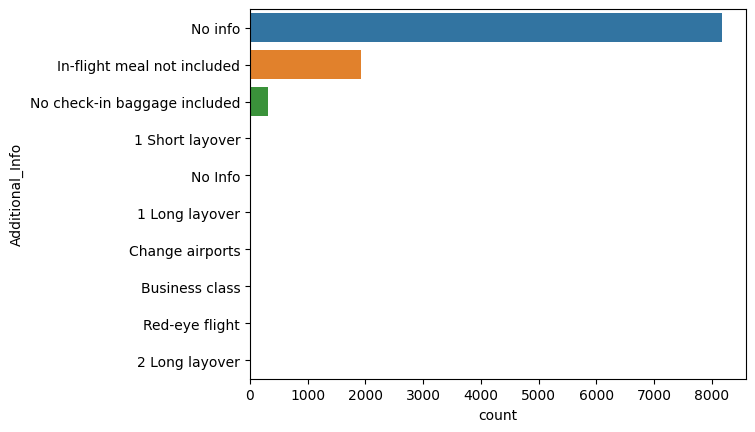

In [43]:
sns.countplot(data=df,y='Additional_Info')

In [44]:
df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10458     4107
10459     4145
10460     7229
10461    12648
10462    11753
Name: Price, Length: 10463, dtype: int64

<Axes: xlabel='Price'>

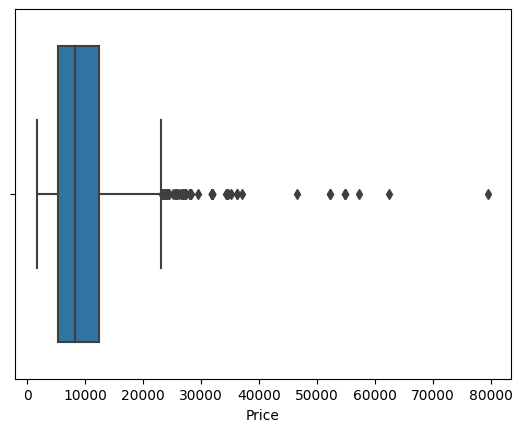

In [45]:
sns.boxplot(data=df,x='Price')

### Check for missing values and hundle it or removing it

In [46]:
df.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009557
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009557
Additional_Info    0.000000
Price              0.000000
StopCount          0.000000
dtype: float64

### Remove missing values from Route and Total_Stops columns by remove values in Rows

In [47]:
df.dropna(axis=0,inplace=True)

In [48]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0


### Check For Duplicated Values

In [49]:
df.duplicated().sum()

3

### Drop Duplicated Values

In [50]:
df.drop_duplicates(inplace=True)

### Reset Index

In [51]:
df.reset_index(drop=True,inplace=True)

In [52]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0


### What is the highest average  price among airlines companies ?

In [53]:
s=df.groupby(df['Airline']).mean()['Price'].sort_values(ascending=False)
s

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11597.074615
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9556.608028
Vistara Premium economy               8962.333333
Vistara                               7801.761006
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5593.745283
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

In [54]:
s=df.groupby(df['Airline']).mean()['Price'].sort_values(ascending=False).index
s

Index(['Jet Airways Business', 'Jet Airways',
       'Multiple carriers Premium economy', 'Multiple carriers', 'Air India',
       'Vistara Premium economy', 'Vistara', 'GoAir', 'IndiGo', 'Air Asia',
       'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')

<Axes: xlabel='Price', ylabel='Airline'>

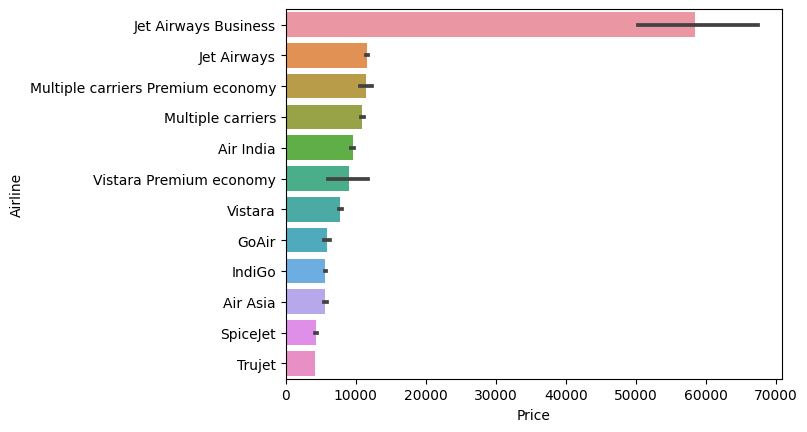

In [55]:
sns.barplot(data=df,y='Airline',x='Price',order=s)

In [56]:
df['Additional_Info'].unique().tolist()

['No info',
 'In-flight meal not included',
 'No check-in baggage included',
 '1 Short layover',
 'No Info',
 '1 Long layover',
 'Change airports',
 'Business class',
 'Red-eye flight',
 '2 Long layover']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10459 non-null  object         
 1   Date_of_Journey  10459 non-null  datetime64[ns] 
 2   Source           10459 non-null  object         
 3   Destination      10459 non-null  object         
 4   Route            10459 non-null  object         
 5   Dep_Time         10459 non-null  datetime64[ns] 
 6   Arrival_Time     10459 non-null  datetime64[ns] 
 7   Duration         10459 non-null  timedelta64[ns]
 8   Total_Stops      10459 non-null  object         
 9   Additional_Info  10459 non-null  object         
 10  Price            10459 non-null  int64          
 11  StopCount        10459 non-null  int64          
dtypes: datetime64[ns](3), int64(2), object(6), timedelta64[ns](1)
memory usage: 980.7+ KB


In [58]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3473
2 stops     1317
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [59]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0


### What is the highest price baased on the flight source and destination ?

In [60]:
df.groupby(['Source','Destination']).sum()['Price'].sort_values(ascending=False)

Source    Destination
Delhi     Cochin         45436856
Kolkata   Banglore       26149219
Banglore  New Delhi      10962693
          Delhi           6507057
Mumbai    Hyderabad       3526617
Chennai   Kolkata         1824949
Name: Price, dtype: int64

### What is the highest price baased on source ?

In [61]:
df.groupby(['Source']).sum()['Price'].sort_values(ascending=False)

Source
Delhi       45436856
Kolkata     26149219
Banglore    17469750
Mumbai       3526617
Chennai      1824949
Name: Price, dtype: int64

### What is the highest price baased on destination ?

In [62]:
df.groupby(['Destination']).sum()['Price'].sort_values(ascending=False)

Destination
Cochin       45436856
Banglore     26149219
New Delhi    10962693
Delhi         6507057
Hyderabad     3526617
Kolkata       1824949
Name: Price, dtype: int64

### What is the Top 3 Popular Destination ?

In [63]:
df['Destination'].value_counts().sort_values(ascending=False).head(3)

Cochin      4344
Banglore    2860
Delhi       1265
Name: Destination, dtype: int64

Encoder = ColumnTransformer(transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),['Airline','Source','Destination'])],remainder='passthrough')

Encoder

In [64]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0


### What is the highest duration based on the flight between two countries ?

In [65]:
df.groupby(['Source','Destination'])['Duration'].value_counts().sort_values().head(3)

Source    Destination  Duration       
Mumbai    Hyderabad    0 days 23:50:00    1
Banglore  New Delhi    0 days 19:00:00    1
                       0 days 19:15:00    1
Name: Duration, dtype: int64

### What is the lowest duration based on the flight between two countries ?

In [66]:
df.groupby(['Source','Destination'])['Duration'].value_counts().sort_values().head()

Source    Destination  Duration       
Mumbai    Hyderabad    0 days 23:50:00    1
Banglore  New Delhi    0 days 19:00:00    1
                       0 days 19:15:00    1
                       0 days 19:30:00    1
                       0 days 19:35:00    1
Name: Duration, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10459 non-null  object         
 1   Date_of_Journey  10459 non-null  datetime64[ns] 
 2   Source           10459 non-null  object         
 3   Destination      10459 non-null  object         
 4   Route            10459 non-null  object         
 5   Dep_Time         10459 non-null  datetime64[ns] 
 6   Arrival_Time     10459 non-null  datetime64[ns] 
 7   Duration         10459 non-null  timedelta64[ns]
 8   Total_Stops      10459 non-null  object         
 9   Additional_Info  10459 non-null  object         
 10  Price            10459 non-null  int64          
 11  StopCount        10459 non-null  int64          
dtypes: datetime64[ns](3), int64(2), object(6), timedelta64[ns](1)
memory usage: 980.7+ KB


### Lets Apply Some Feature Engineering

#### Extract Day And Month And Year From Date_Of_Journey 

In [68]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [69]:
df['Journey_Year']=pd.to_datetime(df['Date_of_Journey']).dt.year
df['Journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month_name(locale='English')
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey']).dt.month
df['Journey_day']=pd.to_datetime(df['Date_of_Journey']).dt.day_name(locale='English')
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey']).dt.day

In [70]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount,Journey_Year,Journey_month,Journey_Month,Journey_day,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0,2019,March,3,Sunday,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2,2019,January,1,Saturday,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2,2019,September,9,Friday,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1,2019,December,12,Thursday,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1,2019,January,1,Thursday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0,2019,September,9,Wednesday,4
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0,2019,April,4,Saturday,27
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0,2019,April,4,Saturday,27
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0,2019,January,1,Thursday,3


### What is the highest month of flights during the year ?

<Axes: xlabel='count', ylabel='Journey_month'>

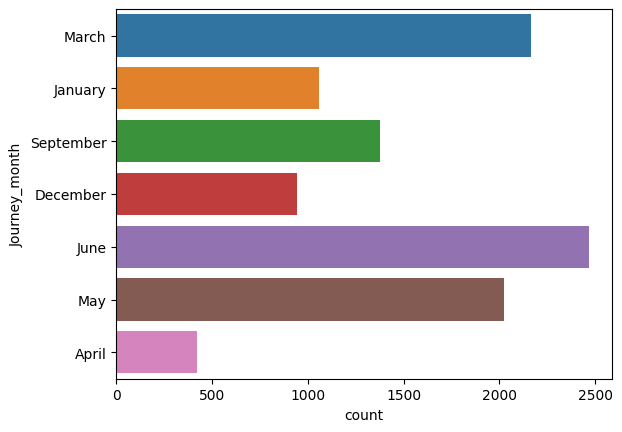

In [71]:
sns.countplot(data=df,y='Journey_month')

# ------------------------------------------------------------------------------------------------

### What is the highest Day of flights ?

<Axes: xlabel='count', ylabel='Journey_day'>

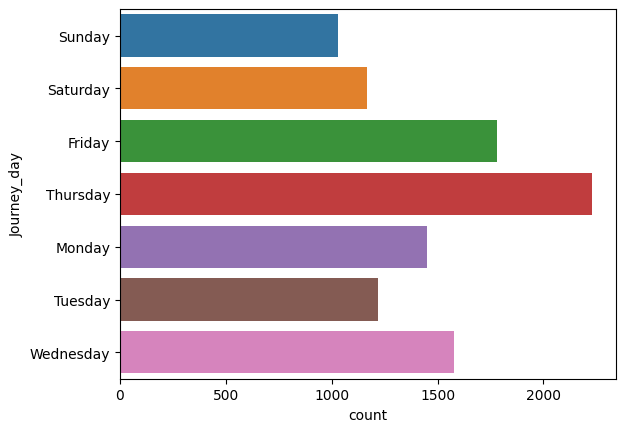

In [72]:
sns.countplot(data=df,y='Journey_day')

In [73]:
def get_season(Journey_Month):
    if Journey_Month in (12,1,2):
        return 'winter'
    elif Journey_Month in (3,4,5):
        return 'spring'
    elif Journey_Month in (6,7,8):
        return 'summer'
    elif Journey_Month in (9,10,11):
        return 'fall'

In [74]:
df['Season']=df['Journey_Month'].apply(get_season)

In [75]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount,Journey_Year,Journey_month,Journey_Month,Journey_day,Journey_Day,Season
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0,2019,March,3,Sunday,24,spring
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2,2019,January,1,Saturday,5,winter
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2,2019,September,9,Friday,6,fall
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1,2019,December,12,Thursday,5,winter
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1,2019,January,1,Thursday,3,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0,2019,September,9,Wednesday,4,fall
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0,2019,April,4,Saturday,27,spring
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0,2019,April,4,Saturday,27,spring
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0,2019,January,1,Thursday,3,winter


### What is the highest season of flights during the year

<Axes: xlabel='count', ylabel='Season'>

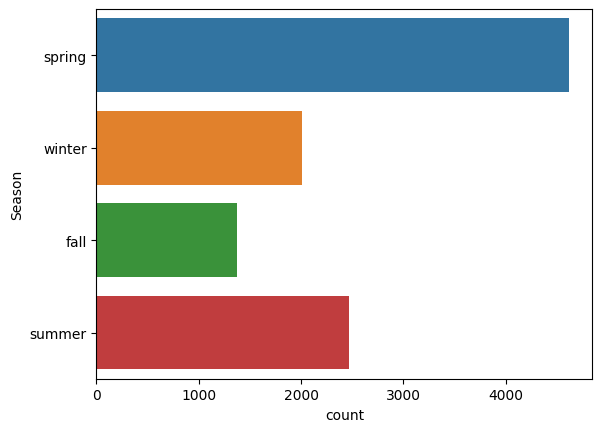

In [76]:
sns.countplot(data=df,y='Season')

In [77]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,StopCount,Journey_Year,Journey_month,Journey_Month,Journey_day,Journey_Day,Season
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,0,2019,March,3,Sunday,24,spring
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-01-05 05:50:00,2019-01-05 13:15:00,0 days 07:25:00,2 stops,No info,7662,2,2019,January,1,Saturday,5,winter
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2019-09-06 09:25:00,2019-09-07 04:25:00,0 days 19:00:00,2 stops,No info,13882,2,2019,September,9,Friday,6,fall
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2019-12-05 18:05:00,2019-12-05 23:30:00,0 days 05:25:00,1 stop,No info,6218,1,2019,December,12,Thursday,5,winter
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2019-01-03 16:50:00,2019-01-03 21:35:00,0 days 04:45:00,1 stop,No info,13302,1,2019,January,1,Thursday,3,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2019-09-04 19:55:00,2019-09-04 22:25:00,0 days 02:30:00,non-stop,No info,4107,0,2019,September,9,Wednesday,4,fall
10455,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,0,2019,April,4,Saturday,27,spring
10456,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,0,2019,April,4,Saturday,27,spring
10457,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2019-01-03 11:30:00,2019-01-03 14:10:00,0 days 02:40:00,non-stop,No info,12648,0,2019,January,1,Thursday,3,winter


In [78]:
df['Journey_Month'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [79]:
df.drop(['Route','Total_Stops','Additional_Info','Journey_month','Journey_day','Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [80]:
df.reset_index(inplace=True,drop=True)

### Let's Encode Categorical Data

In [81]:
df

,Airline,Source,Destination,Price,StopCount,Journey_Year,Journey_Month,Journey_Day,Season
0,IndiGo,Banglore,New Delhi,3897,0,2019,3,24,spring
1,Air India,Kolkata,Banglore,7662,2,2019,1,5,winter
2,Jet Airways,Delhi,Cochin,13882,2,2019,9,6,fall
3,IndiGo,Kolkata,Banglore,6218,1,2019,12,5,winter
4,IndiGo,Banglore,New Delhi,13302,1,2019,1,3,winter
...,...,...,...,...,...,...,...,...,...
10454,Air Asia,Kolkata,Banglore,4107,0,2019,9,4,fall
10455,Air India,Kolkata,Banglore,4145,0,2019,4,27,spring
10456,Jet Airways,Banglore,Delhi,7229,0,2019,4,27,spring
10457,Vistara,Banglore,New Delhi,12648,0,2019,1,3,winter


In [82]:
df['Airline'].value_counts()

Jet Airways                          3699
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [83]:
df['Source'].value_counts()

Delhi       4344
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [84]:
df['Destination'].value_counts()

Cochin       4344
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [85]:
df['Season'].value_counts()

spring    4615
summer    2465
winter    2004
fall      1375
Name: Season, dtype: int64

In [86]:
Encoder = ColumnTransformer(transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),['Source','Destination','Season']),("BE",BinaryEncoder(),["Airline"])],remainder='passthrough')

## now Let's Check and build many techniques algorithms to train and predict to choose the best model

In [87]:
df

,Airline,Source,Destination,Price,StopCount,Journey_Year,Journey_Month,Journey_Day,Season
0,IndiGo,Banglore,New Delhi,3897,0,2019,3,24,spring
1,Air India,Kolkata,Banglore,7662,2,2019,1,5,winter
2,Jet Airways,Delhi,Cochin,13882,2,2019,9,6,fall
3,IndiGo,Kolkata,Banglore,6218,1,2019,12,5,winter
4,IndiGo,Banglore,New Delhi,13302,1,2019,1,3,winter
...,...,...,...,...,...,...,...,...,...
10454,Air Asia,Kolkata,Banglore,4107,0,2019,9,4,fall
10455,Air India,Kolkata,Banglore,4145,0,2019,4,27,spring
10456,Jet Airways,Banglore,Delhi,7229,0,2019,4,27,spring
10457,Vistara,Banglore,New Delhi,12648,0,2019,1,3,winter


In [88]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [89]:
models = []

models.append(("LOgistic" , LogisticRegression()))
models.append(("Linear" , LinearRegression()))
models.append(("CART" , DecisionTreeRegressor()))
models.append(("XG_Boost" , XGBRegressor()))


In [90]:
for model in models:
    steps = []
    steps.append(('encode',Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores = cross_validate(pipeline ,x,y, cv =  5 , scoring='r2', return_train_score=True,error_score='raise')
    print(model[0])
    print("Train_R_Score", scores["train_score"].mean())
    print("Test_R_Score" , scores["test_score"].mean())
    print("-" * 50)

LOgistic
Train_R_Score 0.49420278563537323
Test_R_Score 0.48606740675194915
--------------------------------------------------
Linear
Train_R_Score 0.5228555469779478
Test_R_Score 0.5220223614544439
--------------------------------------------------
CART
Train_R_Score 0.8271470162631248
Test_R_Score 0.7549254428387799
--------------------------------------------------
XG_Boost
Train_R_Score 0.8237263882663652
Test_R_Score 0.7744857502561688
--------------------------------------------------


In [91]:
pipeline

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Source', 'Destination',
                                                   'Season']),
                                                 ('BE', BinaryEncoder(),
                                                  ['Airline'])])),
                ('Scaler', RobustScaler()),
                ('XG_Boost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsamp...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

### The best performing Algorithm is the XG_Boost with a good score.

## ******************************************************************************************************

### let's use Grid Search to find the best number of trees for each model and the depth for each of them

In [92]:
params = {
    
    'Model__learning_rate': [0.01, 0.1, 0.2, 0.3], 
    'Model__n_estimators': [250,300,400,500],  # Number of trees (boosting rounds)
    'Model__reg_alpha': [0.01, 0.1, 0.4, 0.5]

}


params = {
    
    'Model__Learning_Rate':[0.0001, 0.001, 0.01, 0.1],
    'Model__N_Estimators':[110, 120, 130, 140, 150],
    'Model__Reg_Alpha':[0.01,0.1,0.5,0.9]
}

params = {
    'Model__learning_rate': [0.01, 0.1, 0.2], 
    'Model__n_estimators': [110,120,130],  # Number of trees (boosting rounds)
    'Model__reg_alpha': [0, 0.1, 0.5]

}


In [93]:
steps = []
steps.append(('encode',Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(('Model',XGBRegressor()))
pipeline=Pipeline(steps=steps)
pipeline

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Source', 'Destination',
                                                   'Season']),
                                                 ('BE', BinaryEncoder(),
                                                  ['Airline'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [94]:
grid_search = GridSearchCV(estimator=pipeline,param_grid=params,cv=10,scoring='r2',return_train_score=True,n_jobs=-1)

In [95]:
grid_search.fit(x,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Source',
                                                                          'Destination',
                                                                          'Season']),
                                                                        ('BE',
                                                                         BinaryEncoder(),
                                                                         ['Airline'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     col...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Model__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'Model__n_estimators': [250, 300, 400, 500],
                         'Model__reg_alpha': [0.01, 0.1, 0.4, 0.5]},
             return_train_score=True, scoring='r2')

In [96]:
grid_search.best_params_

{'Model__learning_rate': 0.1,
 'Model__n_estimators': 250,
 'Model__reg_alpha': 0.5}

In [97]:
print('train_Mean_Score',grid_search.cv_results_["mean_train_score"].mean())
print('test_Mean_Score',grid_search.cv_results_["mean_test_score"].mean())

train_Mean_Score 0.812822837668846
test_Mean_Score 0.7766499717328224


In [98]:
final_model = grid_search.best_estimator_

In [99]:
final_model

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Source', 'Destination',
                                                   'Season']),
                                                 ('BE', BinaryEncoder(),
                                                  ['Airline'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=250,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [100]:
joblib.dump(final_model , "Model.pkl")
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']